### Importing Pandas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Oppening the csv file

In [2]:
df = pd.read_csv("./students_scores.csv")

### Seeing the data:

In [3]:
df.head()

,student name,score 1,score 2,score 3
0,Alice,85,90,75
1,Bob,92,88,93
2,Charlie,78,95,82
3,David,55,60,45
4,Emily,82,91,84


In [4]:
df.shape

(52, 4)

In [5]:
df.columns

Index(['student name', 'score 1', 'score 2', 'score 3'], dtype='object')

In [6]:
has_null = df.isnull().values.any()
print(has_null)

False


# Creating the "grade" column:

In [7]:
df["grade"] = df[["score 1", "score 2", "score 3"]].mean(axis=1)
# formatting the data:
df['grade'] = df['grade'].apply(lambda x: f"{x:.2f}")
df.head()

,student name,score 1,score 2,score 3,grade
0,Alice,85,90,75,83.33
1,Bob,92,88,93,91.00
2,Charlie,78,95,82,85.00
3,David,55,60,45,53.33
4,Emily,82,91,84,85.67


# Creating the "status" column:

In [8]:
df["grade"] = pd.to_numeric(df["grade"])

In [9]:
df["status"] = df["grade"].apply(lambda x: "approved" if x >= 60 else "failed")

In [10]:
df

,student name,score 1,score 2,score 3,grade,status
0,Alice,85,90,75,83.33,approved
1,Bob,92,88,93,91.00,approved
2,Charlie,78,95,82,85.00,approved
3,David,55,60,45,53.33,failed
4,Emily,82,91,84,85.67,approved
5,Frank,75,86,90,83.67,approved
6,Grace,94,89,92,91.67,approved
7,Henry,88,93,85,88.67,approved
8,Isabella,79,87,91,85.67,approved
9,Jack,95,80,86,87.00,approved


# Getting the higher grade:

In [11]:
# highest mean:
highest_grade = df["grade"].max()
print(highest_grade)

91.67


In [12]:
# student with the highest mean:
highest_grade_id = df["grade"].idxmax()
highest_grade_student = df.loc[highest_grade_id, "student name"]
print(highest_grade_student)

Grace


# Getting the average grade

In [23]:
class_mean = df['grade'].mean()
print(f"{class_mean:.2f}")

82.60


# Creating dataframes for approved and failes students

In [14]:
approved_students_df = df[df["status"] == "approved"]
failed_students_df = df[df["status"] == "failed"]

In [15]:
failed_students_df

,student name,score 1,score 2,score 3,grade,status
3,David,55,60,45,53.33,failed
26,Abigail,60,40,35,45.00,failed
29,Daniel,45,50,30,41.67,failed


In [25]:
print(f"Approved students: {approved_students_df.shape[0]}")
print(f"Failed students: {failed_students_df.shape[0]}")

Approved students: 49
Failed students: 3


# Exporting the resulting csv:

In [16]:
df.to_csv("result.csv", index=False)

# Plotting the data

## Approved x Failed students

In [17]:
# checking the percentage of approved/failed students:
df["status"].value_counts()

status
approved    49
failed       3
Name: count, dtype: int64

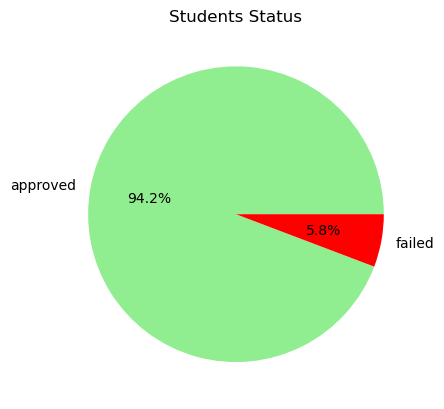

<Figure size 400x400 with 0 Axes>

In [18]:
# plotting the data:
status_counts = df["status"].value_counts()
plt.pie(status_counts, labels=status_counts.index, autopct="%1.1f%%", colors=["lightgreen", "red"])
plt.title("Students Status")
plt.figure(figsize=(4, 4))
plt.show()

## Most frequent grades

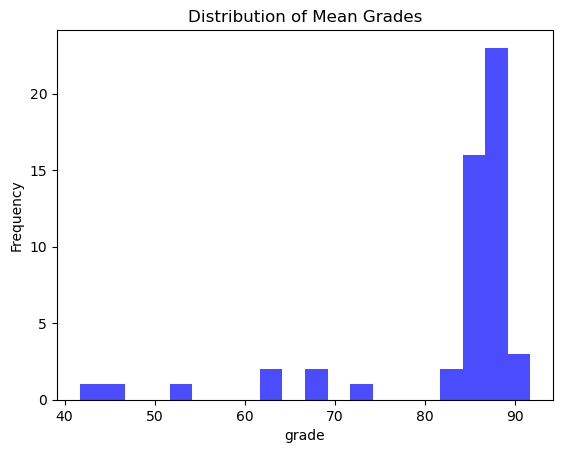

In [19]:
plt.hist(df['grade'], bins=20, color="blue", alpha=0.7)
plt.xlabel("grade")
plt.ylabel("Frequency")
plt.title("Distribution of Mean Grades")
plt.show()